# Data research of the scooter rental service

In [1]:
# loading all necessary libraries for the project

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial

## Loading and exploring the data

### User Data

In [2]:
try:
    data_users = pd.read_csv('/Users/ira-bobrineva/Downloads/users_go.csv')
except:
    data_users = pd.read_csv('/datasets/users_go.csv')
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


So far, the data is fine, there are no missing values, and the data types are correct. For optimization, one can convert the values from int64 to int32 to reduce memory usage. The data allows this adjustment.

### Rides data

In [4]:
try:
    data_rides = pd.read_csv('/Users/ira-bobrineva/Downloads/rides_go.csv')
except:
    data_rides = pd.read_csv('/datasets/rides_go.csv')
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


There are no missing values, but I will correct the data type for the date and convert the values from int64 to int32 for optimization and to reduce memory usage.

### Subscription data

In [6]:
try:
    data_subscriptions = pd.read_csv('/Users/ira-bobrineva/Downloads/subscriptions_go.csv') 
except:
    data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
data_subscriptions.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


So far, the data is fine, there are no missing values, and the data types are correct. For optimization, will convert the values from int64 to int32 to reduce memory usage.

## Data preprocessing

### Changing data types

In [8]:
data_users_dict = {'user_id': 'int16', 'age': 'int16'}
data_users = data_users.astype(data_users_dict)

data_subscriptions_dict = {'minute_price': 'int16', 'start_ride_price': 'int16', 'subscription_fee': 'int16'}
data_subscriptions = data_subscriptions.astype(data_subscriptions_dict)

data_rides['user_id'] = data_rides['user_id'].astype('int16')

data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

data_rides.info()
data_users.info()
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int16         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int16(1)
memory usage: 458.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int16 
 1   name               1565 non-null   object
 2   age                1565 non-null   int16 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int16(2), object(3)
memory usage: 42.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries

### Adding a column with the month number

In [9]:
data_rides['month_number'] = data_rides['date'].dt.month
data_rides.head()

,user_id,distance,duration,date,month_number
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


There are no missing values in the dataframes, but I will check for duplicates.

### Removing duplicates

In [10]:
data_users.duplicated().sum()

31

In [11]:
data_users_clean = data_users.drop_duplicates().reset_index(drop=True) # adjusting the index order in the dataframe after removing duplicates
data_users_clean.duplicated().sum()

0

In [12]:
data_rides.duplicated().sum()

0

In [13]:
data_subscriptions.duplicated().sum()

0

## Research data analysis

### Frequency of city occurrences

In [14]:
# displaying unique city values
data_users_clean['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [15]:
# building a pivot table with the city and its frequency of occurrence
city_amount = data_users_clean.pivot_table(index='city', values='user_id', aggfunc='count')
city_amount.columns = ['Frequency of occurrence']
city_amount = city_amount.sort_values(by='Frequency of occurrence', ascending=False)
city_amount

,Frequency of occurrence
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


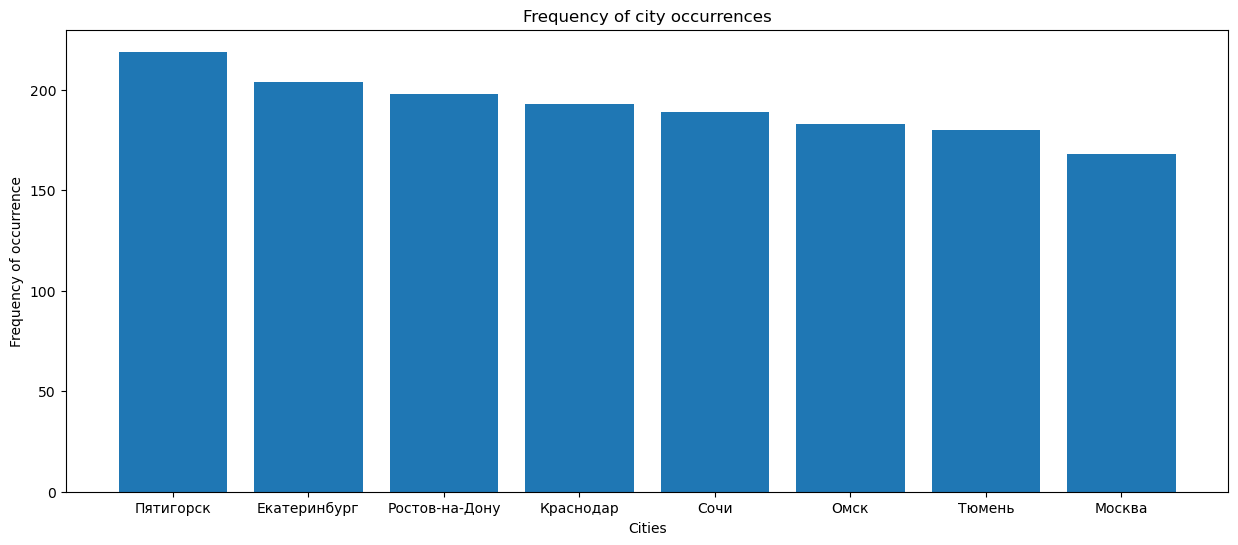

In [16]:
# displaying a bar chart for the frequency of city occurrences

plt.figure(figsize=(15, 6))
plt.bar(city_amount.index, city_amount['Frequency of occurrence'])
plt.xlabel('Cities')
plt.ylabel('Frequency of occurrence')
plt.title('Frequency of city occurrences')
plt.show()

Most users are from Pyatigorsk. It is possible that the company's headquarters is located there. The second and third cities are Yekaterinburg and Rostov-on-Don. In the capital, the company's services are used the least.

### Distribution of users with subscription and users without subscription

In [17]:
# building a pivot table with the number of users based on subscriptions

free_vs_ultra = data_users_clean.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
free_vs_ultra.columns = ['Number of users']
free_vs_ultra.sort_values(by='Number of users', ascending=False)

,Number of users
subscription_type,
free,835
ultra,699


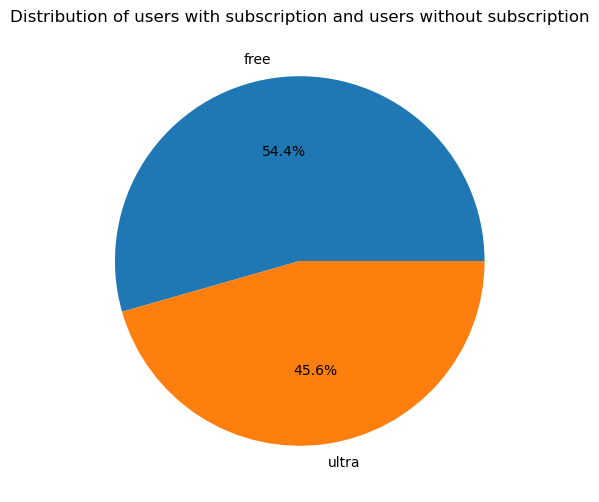

In [18]:
plt.figure(figsize=(6, 6))
plt.pie(free_vs_ultra['Number of users'], labels=free_vs_ultra.index, autopct='%1.1f%%')
plt.title('Distribution of users with subscription and users without subscription')
plt.show()

There are slightly more users without a subscription than users with a subscription.

### User age

In [19]:
# displaying unique age values, verifying that there are no anomalous values
data_users_clean['age'].unique()

array([22, 31, 20, 26, 28, 25, 23, 21, 18, 27, 24, 29, 32, 14, 19, 30, 17,
       12, 35, 33, 13, 15, 37, 16, 34, 38, 36, 39, 43], dtype=int16)

In [20]:
data_users_clean['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [21]:
# building a function that will categorize users by age

def categorize_age(age):
    try:
        if 12 <= age <= 18:
            return '12-18'
        elif 19 <= age <= 25:
            return '19-25'
        elif 26 <= age <= 35:
            return '26-35'
        elif age >= 36:
            return '36+'
    except:
        pass

# applying the function to the age_category column
data_users_clean['age_category'] = data_users_clean['age'].apply(categorize_age)

data_users_clean.head()

,user_id,name,age,city,subscription_type,age_category
0,1,Кира,22,Тюмень,ultra,19-25
1,2,Станислав,31,Омск,ultra,26-35
2,3,Алексей,20,Москва,ultra,19-25
3,4,Константин,26,Ростов-на-Дону,ultra,26-35
4,5,Адель,28,Омск,ultra,26-35


In [22]:
# displaying the table with the distribution of users by age groups
age_category = data_users_clean.pivot_table(index='age_category', values='user_id', aggfunc='count')
age_category.columns = ['Number of users']
age_category.sort_values(by='Number of users', ascending=False)

,Number of users
age_category,
19-25,736
26-35,660
12-18,125
36+,13


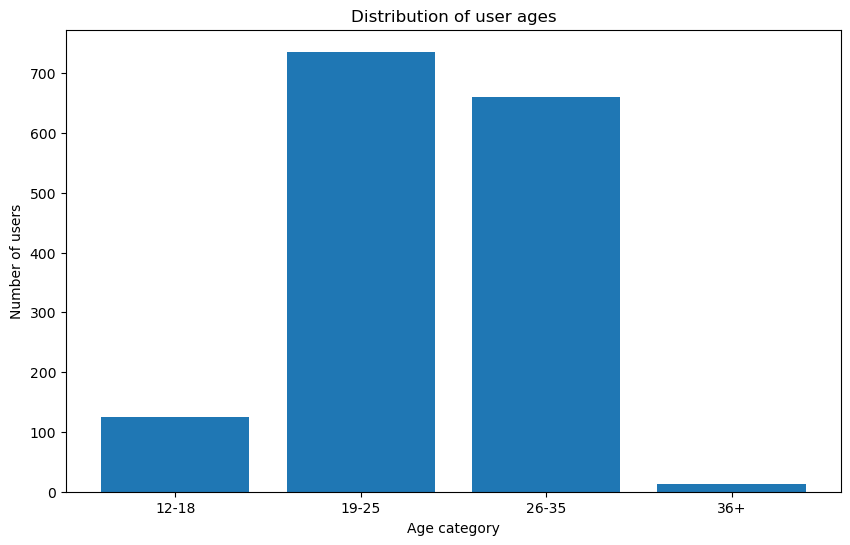

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(age_category.index, age_category['Number of users'])
plt.xlabel('Age category')
plt.ylabel('Number of users')
plt.title('Distribution of user ages')
plt.show()

Most scooter users are young people under 35. This is predictable, as scooters are a relatively new mode of transportation that the youth have adopted the fastest. Additionally, to use scooters, one needs to be somewhat proficient with smartphones. This is more challenging for the older generation.

### Distance covered by user in a single trip

In [24]:
# displayed the maximum value to then check for any limits or constraints.
data_rides['distance'].max()

7211.007744598519

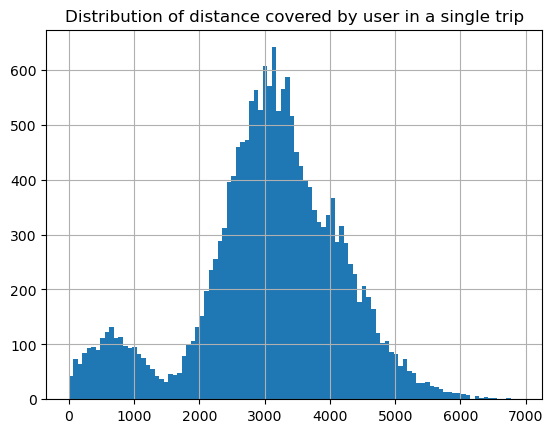

In [25]:
# building a histogram of the distance distribution
data_rides_cropped = data_rides.query('distance < 7000') # limit the value to 7 km because data beyond that point is sparse
data_rides_cropped['distance'].hist(bins=100)
plt.title('Distribution of distance covered by user in a single trip')
plt.show()

Typically, users travel up to 4.5 km per trip, with most trips being around 3 km. There is a noticeable peak at around 1.5 km. Such short trips might not have been for practical purposes: people might have taken scooters just to try them out or for a bit of fun.

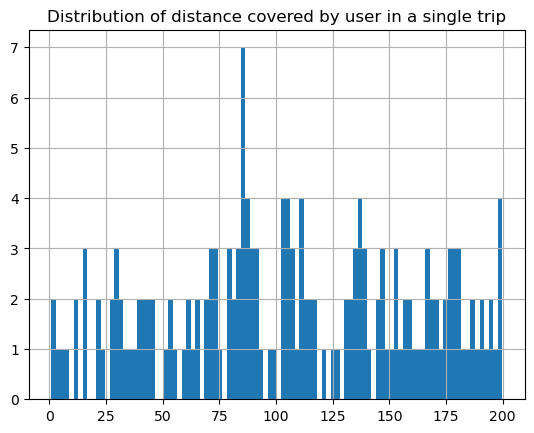

In [26]:
data_rides_cropped = data_rides.query('0 <= distance < 200') 
data_rides_cropped['distance'].hist(bins=100)
plt.title('Distribution of distance covered by user in a single trip')
plt.show()

There are also trips with very short distances—less than 200 meters. This might include situations where a problem was identified with the scooter, and the user quickly returned it to its place. The presence of a few distance peaks suggests that there may be several usage scenarios for the application, and it might be worth addressing these categories separately.

### Ride duration

In [27]:
# displaying the maximum value to then check for any limits or constraints
data_rides['duration'].max()

40.82396261922424

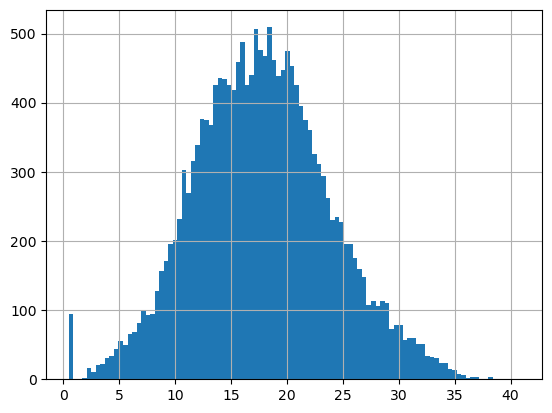

In [28]:
# building a histogram of the trip duration distribution
data_rides['duration'].hist(bins=100)
plt.show()

The histogram shows an unusual spike in the range from 0 to 1. Examining these outliers in more detail.

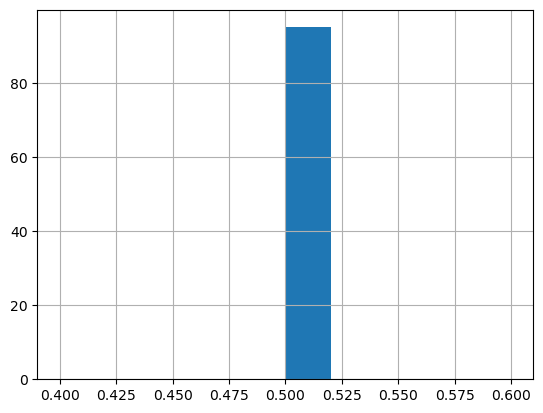

In [29]:
data_rides['duration'].hist(bins=10, range=(0.4, 0.6))
plt.show()

In [30]:
data_rides.query('duration < 1')['duration'].unique()

array([0.5])

In [31]:
data_rides.query('duration < 1')['distance'].head(10)

6531    4196.445201
6570    4830.824371
6680    4684.004397
6695    5215.642710
6768    5197.436649
6860    6225.520342
6883    4452.491518
7018    4406.954812
7160    5286.167732
7364    4881.391865
Name: distance, dtype: float64

It appears that people are covering around 4-5 km in just 0.5 seconds. This seems like an error in the scooter rental system, possibly indicating some kind of testing. I will remove the anomaly.

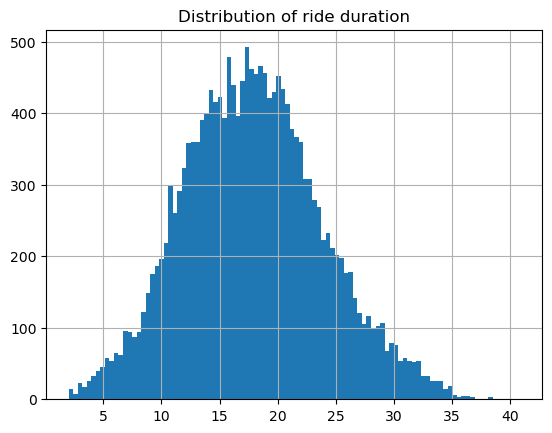

In [32]:
data_rides_clean = data_rides[(data_rides['duration'] > 0.5)]
data_rides_clean['duration'].hist(bins=100)
plt.title('Distribution of ride duration')
plt.show()

In [33]:
# displaying the minimum value to verify that there are no other unusual values
data_rides_clean['duration'].min()

2.0356324681963884

In [34]:
data_rides_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17973 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       17973 non-null  int16         
 1   distance      17973 non-null  float64       
 2   duration      17973 non-null  float64       
 3   date          17973 non-null  datetime64[ns]
 4   month_number  17973 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int16(1), int32(1)
memory usage: 667.0 KB


## Data merging

In [35]:
# the first step is to merge the tables `data_users_clean` and `data_rides_clean` using the common column `user_id`
users_vs_rides = pd.merge(data_users_clean, data_rides_clean, on='user_id')
users_vs_rides

,user_id,name,age,city,subscription_type,age_category,distance,duration,date,month_number
0,1,Кира,22,Тюмень,ultra,19-25,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,19-25,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,19-25,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,19-25,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,19-25,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,19-25,3781.098080,19.822962,2021-11-04,11
17969,1534,Альберт,25,Краснодар,free,19-25,2840.423057,21.409799,2021-11-16,11
17970,1534,Альберт,25,Краснодар,free,19-25,3826.185507,18.435051,2021-11-18,11
17971,1534,Альберт,25,Краснодар,free,19-25,2902.308661,16.674362,2021-11-27,11


In [36]:
users_vs_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17973 entries, 0 to 17972
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int16         
 1   name               17973 non-null  object        
 2   age                17973 non-null  int16         
 3   city               17973 non-null  object        
 4   subscription_type  17973 non-null  object        
 5   age_category       17973 non-null  object        
 6   distance           17973 non-null  float64       
 7   duration           17973 non-null  float64       
 8   date               17973 non-null  datetime64[ns]
 9   month_number       17973 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int16(2), int32(1), object(4)
memory usage: 1.1+ MB


In [37]:
# adjusting the data type of the month number for better readability
users_vs_rides['month_number'] = users_vs_rides['month_number'].astype('int16')
users_vs_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17973 entries, 0 to 17972
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int16         
 1   name               17973 non-null  object        
 2   age                17973 non-null  int16         
 3   city               17973 non-null  object        
 4   subscription_type  17973 non-null  object        
 5   age_category       17973 non-null  object        
 6   distance           17973 non-null  float64       
 7   duration           17973 non-null  float64       
 8   date               17973 non-null  datetime64[ns]
 9   month_number       17973 non-null  int16         
dtypes: datetime64[ns](1), float64(2), int16(3), object(4)
memory usage: 1.1+ MB


In [38]:
# The second step is to merge the `users_vs_rides` table and the `data_subscriptions` table using the common column `subscription_type`.
data_all = pd.merge(users_vs_rides, data_subscriptions, on='subscription_type')
data_all

,user_id,name,age,city,subscription_type,age_category,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,19-25,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,19-25,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,19-25,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,19-25,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,19-25,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,19-25,3781.098080,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,19-25,2840.423057,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,19-25,3826.185507,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,19-25,2902.308661,16.674362,2021-11-27,11,8,50,0


In [39]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17973 entries, 0 to 17972
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int16         
 1   name               17973 non-null  object        
 2   age                17973 non-null  int16         
 3   city               17973 non-null  object        
 4   subscription_type  17973 non-null  object        
 5   age_category       17973 non-null  object        
 6   distance           17973 non-null  float64       
 7   duration           17973 non-null  float64       
 8   date               17973 non-null  datetime64[ns]
 9   month_number       17973 non-null  int16         
 10  minute_price       17973 non-null  int16         
 11  start_ride_price   17973 non-null  int16         
 12  subscription_fee   17973 non-null  int16         
dtypes: datetime64[ns](1), float64(2), int16(6), object(4)
memory 

### Data on users with subscription

In [40]:
# Creating a data subset for users with a subscription
users_ultra = data_all[data_all['subscription_type'] == 'ultra'].reset_index(drop=True) 
users_ultra

,user_id,name,age,city,subscription_type,age_category,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,19-25,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,19-25,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,19-25,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,19-25,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,19-25,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,19-25,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,19-25,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,19-25,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,19-25,4707.845501,15.839579,2021-10-17,10,6,0,199


### Data on users without subscription

In [41]:
# creating a data subset for users without a subscription
users_free = data_all[data_all['subscription_type'] == 'free'].reset_index(drop=True) 
users_free

,user_id,name,age,city,subscription_type,age_category,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,19-25,2515.690719,14.944286,2021-01-02,1,8,50,0
1,700,Айдар,22,Омск,free,19-25,846.932642,16.234663,2021-02-01,2,8,50,0
2,700,Айдар,22,Омск,free,19-25,4004.434142,20.016628,2021-02-04,2,8,50,0
3,700,Айдар,22,Омск,free,19-25,1205.911290,9.782872,2021-02-10,2,8,50,0
4,700,Айдар,22,Омск,free,19-25,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11468,1534,Альберт,25,Краснодар,free,19-25,3781.098080,19.822962,2021-11-04,11,8,50,0
11469,1534,Альберт,25,Краснодар,free,19-25,2840.423057,21.409799,2021-11-16,11,8,50,0
11470,1534,Альберт,25,Краснодар,free,19-25,3826.185507,18.435051,2021-11-18,11,8,50,0
11471,1534,Альберт,25,Краснодар,free,19-25,2902.308661,16.674362,2021-11-27,11,8,50,0


### Histograms with distributions: Ultra vs Free.

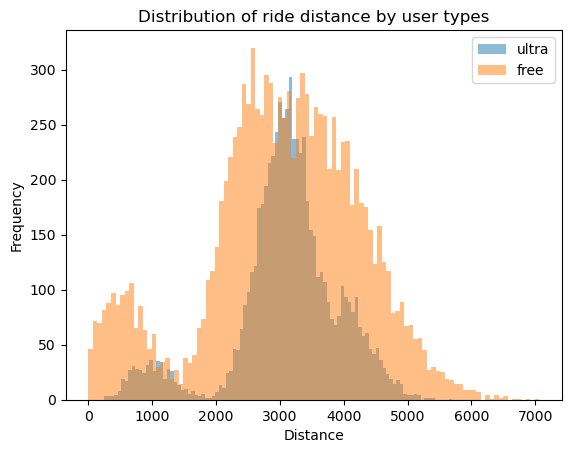

In [42]:
# building histograms of trip distance distribution by user types

plt.hist(users_ultra['distance'], bins=100, alpha=0.5, label='ultra')
plt.hist(users_free['distance'], bins=100, alpha=0.5, label='free')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of ride distance by user types')
plt.legend(loc='upper right')

plt.show()


Most trips by users with subscriptions are between 2.5 km and 4 km. These users likely take scooters for practical purposes, using them as an alternative to public transportation. There's also a peak around 1 km, which represents very short trips. These trips are less frequent, probably because users can simply walk to their destinations without spending much time.

The trip distances of users without a subscription are slightly different. These users tend to take more short trips—up to 1 km and up to 3 km. The majority of their trips range from 2 to 4.5 km.

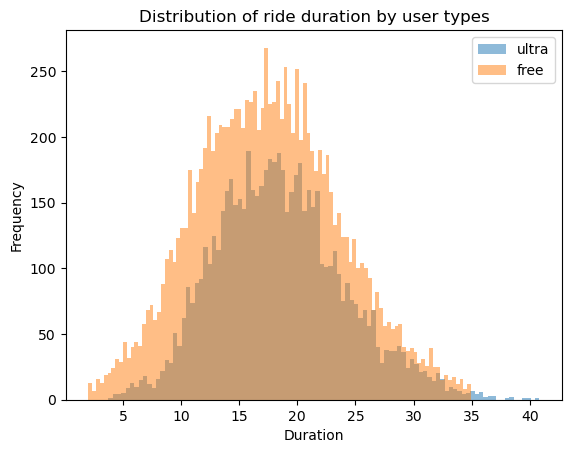

In [43]:
# building histograms of trip duration distribution by user types
plt.hist(users_ultra['duration'], bins=100, alpha=0.5, label='ultra')
plt.hist(users_free['duration'], bins=100, alpha=0.5, label='free')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of ride duration by user types')
plt.legend(loc='upper right')

plt.show()

Most trips by users with subscriptions last between 10 to 25 minutes. Since there are more users without a subscription, the histogram for their trips is denser. The distribution of trip duration for them is approximately the same as for users with a subscription—the majority of trips last between 10 to 25 minutes.

## Revenue calculation

In [44]:
# building a pivot table with data on users by month
data_all['duration'] = np.ceil(data_all['duration']) 
data_all_pivot = data_all.pivot_table(index=['user_id', 'month_number'], values=['distance', 'duration', 'subscription_type'], aggfunc={'distance':'sum', 'duration':['sum', 'count'], 'subscription_type':'first'})
data_all_pivot.columns = ['Total distance', 'Number of rides', 'Total duration', 'Rate']
data_all_pivot.head(10)

Total distance  Number of rides  Total duration   Rate
user_id month_number                                                        
1       1                7027.511294                2            42.0  ultra
        4                 754.159807                1             7.0  ultra
        8                6723.470560                2            46.0  ultra
        10               5809.911100                2            32.0  ultra
        11               7003.499363                3            56.0  ultra
        12               6751.629942                2            28.0  ultra
2       3               10187.723006                3            63.0  ultra
        4                6164.381824                2            40.0  ultra
        6                3255.338202                1            14.0  ultra
        7                6780.722964                2            48.0  ultra

### Monthly revenue calculation

In [45]:
# building a function that will calculate monthly revenue per user
def count_revenue(tariff):
    try:
        if tariff['Rate'] == 'ultra':
            return 6*tariff['Total duration'] + 199
        elif tariff['Rate'] == 'free':
            return 50*tariff['Number of rides'] + 8*tariff['Total duration'] 
    except:
        pass

# adding a column with monthly revenue.
data_all_pivot['Monthly revenue'] = data_all_pivot.apply(count_revenue, axis=1)
data_all_pivot.head(10)

Total distance  Number of rides  Total duration   Rate  \
user_id month_number                                                           
1       1                7027.511294                2            42.0  ultra   
        4                 754.159807                1             7.0  ultra   
        8                6723.470560                2            46.0  ultra   
        10               5809.911100                2            32.0  ultra   
        11               7003.499363                3            56.0  ultra   
        12               6751.629942                2            28.0  ultra   
2       3               10187.723006                3            63.0  ultra   
        4                6164.381824                2            40.0  ultra   
        6                3255.338202                1            14.0  ultra   
        7                6780.722964                2            48.0  ultra   

                      Monthly revenue  
user_id month_number                   
1       1                       451.0  
        4                       241.0  
        8                       475.0  
        10                      391.0  
        11                      535.0  
        12                      367.0  
2       3                       577.0  
        4                       439.0  
        6                       283.0  
        7                       487.0

## Hypothesis testing

### Ultra vs Free: Whose trips are longer?

It is important to understand whether subscribed users spend more time on trips. If they do, subscribed users might be more profitable for the company.

Null Hypothesis: Subscribed users do not spend more time on trips than non-subscribed users.

Alternative Hypothesis: Subscribed users spend more time on trips than non-subscribed users.

In [46]:
# creating slices for users with and without subscriptions

ultra_duration = data_all[data_all['subscription_type'] == 'ultra']['duration']
free_duration = data_all[data_all['subscription_type'] == 'free']['duration']

alpha = 0.05 # specified the level of statistical significance

# conducting a t-test for two samples, with the alternative hypothesis being one-sided "greater"
results = st.ttest_ind(ultra_duration, free_duration, alternative='greater')

print(f'p-value: {results.pvalue}')

# checking the p-value
if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('There is no basis to reject the null hypothesis')

p-value: 8.577910347796266e-28
Reject the null hypothesis


There is a basis to say that subscribed users spend more time on trips.


### Do Ultra users travel more than 3130 meters?

A trip distance of 3130 meters is optimal in terms of scooter wear and tear. Can we say that the average distance traveled by subscribed users in one trip does not exceed 3130 meters?
 
Null Hypothesis: The average distance traveled by subscribed users in one trip does not exceed 3130 meters.

Alternative Hypothesis: The average distance traveled by subscribed users in one trip exceeds 3130 meters.

In [47]:
# creating a slice for subscribed users and specifying the optimal distance value
ultra_distance = data_all[data_all['subscription_type'] == 'ultra']['distance']
optimal_distance = 3130

alpha = 0.05

# conducting a one-sample test, with the alternative hypothesis being one-sided "greater"
results = st.ttest_1samp(ultra_distance, optimal_distance, alternative='greater')

print(f'p-value: {results.pvalue}')

# checking the p-value
if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('There is no basis to reject the null hypothesis')

p-value: 0.9195368847849785
There is no basis to reject the null hypothesis


The average distance traveled by subscribed users in one trip does not exceed 3130 meters. This aligns with the histogram.

### Is the revenue from Ultra users higher than from Free users?

I will check whether the monthly revenue from subscribed users is higher than the revenue from non-subscribed users.

Null Hypothesis: The monthly revenue from subscribed users is not higher than the monthly revenue from non-subscribed users.

Alternative Hypothesis: The monthly revenue from subscribed users is higher than the monthly revenue from non-subscribed users.

In [50]:
# creating slices for users with and without subscriptions
ultra_revenue = data_all_pivot[data_all_pivot['Rate'] == 'ultra']['Monthly revenue']
free_revenue = data_all_pivot[data_all_pivot['Rate'] == 'free']['Monthly revenue']


alpha = 0.05

# conducting a t-test for two samples, with the alternative hypothesis being one-sided "greater"
results = st.ttest_ind(ultra_revenue, free_revenue, alternative='greater')

print(f'p-value: {results.pvalue}')

# checking the p-value
if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('There is no basis to reject the null hypothesis')

p-value: 2.0314113674863288e-30
Reject the null hypothesis


The monthly revenue from subscribed users is higher than the revenue from non-subscribed users.

## Conclusions

In Pyatigorsk, there are the most users, possibly because the company's headquarters is located there. The second and third cities are Yekaterinburg and Rostov-on-Don. In the capital, company's services are used the least.

- The majority of users are young people under 35. This is predictable because scooters are a relatively new form of transport that young people have adopted the quickest. To use scooters, one must also be more adept with smartphones, which is harder for the older generation.
- Typically, users travel up to 4.5 km per trip, with most trips being around 3 km. There is a notable peak around trips up to 1.5 km. These trips might not have been for practical purposes; people may have just taken scooters to try them out or for a bit of fun.
- There are some odd trips lasting 0.5 seconds in the data, which seem to indicate an issue with the scooter rental system. The reasons for this error need to be investigated.
- There are slightly more non-subscribed users than subscribed ones. Most trips by subscribed users last from 10 to 25 minutes, and most distances range from 2.5 km to 4 km. The duration distribution of trips for non-subscribed users is roughly the same as for subscribed users—the majority of trips last from 10 to 25 minutes. However, the distances differ a bit: non-subscribed users make more short trips—up to 1 km and up to 3 km. Most travel between 2 and 4.5 km.
- Regarding hypotheses: subscribed users spend more time on trips, the average distance per trip does not exceed the optimal 3130 meters, and the monthly revenue is higher than that from non-subscribed users. All indications are that subscribed users are more profitable than non-subscribed users. However, it is not advisable to completely abandon the free offering, as there are more non-subscribed users than subscribed ones.